In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[4, 8, 10, 3, 7]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [7]:
import numpy as np
np.cumsum(s)

2     0.0270
3     0.0826
4     0.1623
5     0.2724
6     0.4156
7     0.5746
8     0.7165
9     0.8283
10    0.9130
11    0.9726
12    1.0000
Name: count, dtype: float64

<Axes: >

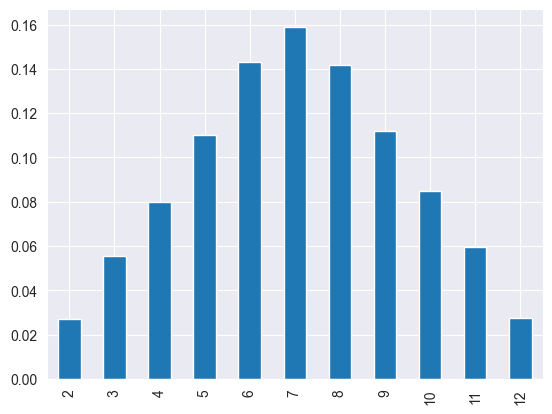

In [8]:
s.plot(kind='bar')

<Axes: >

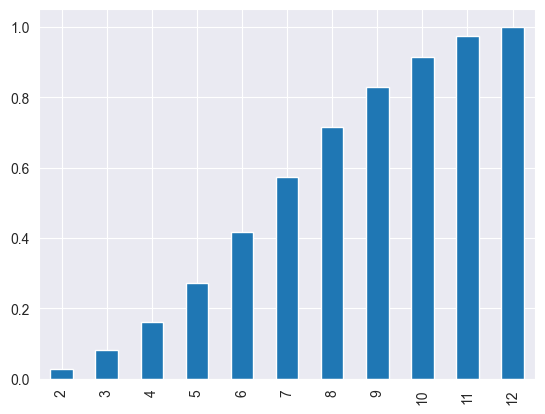

In [9]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [39]:
sample.mean()

49.895007852762

(array([ 11.,  35., 105., 195., 263., 215., 122.,  42.,  10.,   2.]),
 array([35.19457516, 38.4021179 , 41.60966064, 44.81720338, 48.02474612,
        51.23228886, 54.43983161, 57.64737435, 60.85491709, 64.06245983,
        67.27000257]),
 <BarContainer object of 10 artists>)

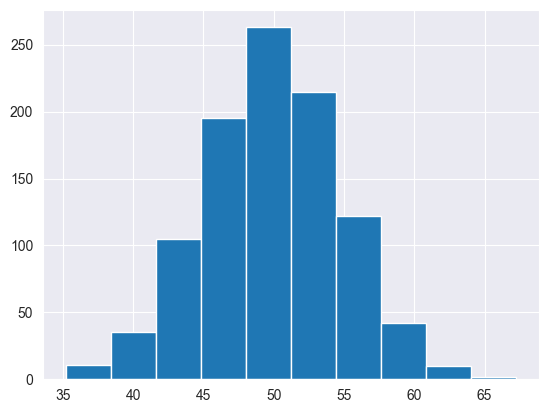

In [40]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [41]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [42]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)
# dist = norm(60, 12) 
# If we run the above commented line instead of the above code it will not give a proper Normal histogram and pdf

In [43]:
values = np.linspace(sample.min(),sample.max(),100)

In [44]:
sample.max()

67.27000257087089

In [45]:
probabilities = [dist.pdf(value) for value in values]

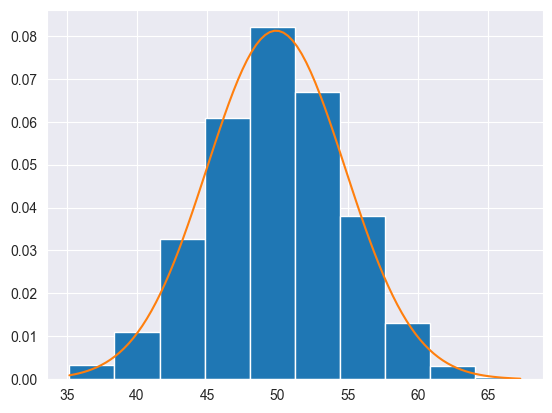

In [46]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

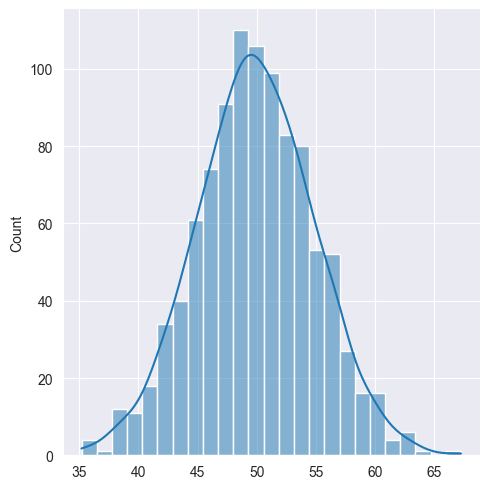

In [50]:
import seaborn as sns
sns.displot(sample,  kde=True)

# KDE

In [20]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [21]:
sample

array([22.09063294, 25.18344047, 24.19668087, 19.53934512, 16.56800015,
       16.45123781, 29.41645448, 37.76920256, 14.66828492, 13.33711037,
       18.63425905, 16.18930322, 15.51867575, 13.75863254,  8.05793969,
       22.03603837, 23.74149942, 18.92337116, 15.81547999, 17.75242177,
        9.40452805, 26.40278436, 21.77916226, 19.39242998, 19.08931342,
       26.77981859, 28.69192224, 40.71706607, 11.14951134, 17.94547758,
       14.72632361, 18.50525772, 14.71689877, 20.79033193, 22.80141465,
       16.18856217, 16.65285832, 20.75609962, 20.69202245, 13.31504767,
       24.6504918 , 21.73794014, 25.97172089, 11.51040129, 15.95144112,
       15.24710144, 21.76471822, 15.70917739, 22.26240457, 13.7668    ,
       21.92322949, 19.23368944, 25.84263327, 13.46369064, 24.44628907,
       25.40841656, 29.22387531, 18.08152084, 17.73249494, 22.61887959,
       19.7406639 , 18.18509823, 18.00435887, 13.74725229, 21.26963076,
       20.97320495, 19.44547557, 29.48415153, 23.53245861, 12.81

(array([ 1.,  2.,  4.,  4.,  1.,  7.,  6., 16., 15., 20., 20., 28., 28.,
        23., 22., 23., 15., 16., 13., 22.,  4.,  5., 11., 18.,  9., 15.,
        14., 36., 46., 59., 58., 56., 52., 49., 62., 50., 43., 38., 27.,
        17., 15.,  8.,  8.,  6.,  2.,  1.,  3.,  1.,  0.,  1.]),
 array([ 5.81185432,  6.86275507,  7.91365583,  8.96455658, 10.01545733,
        11.06635809, 12.11725884, 13.16815959, 14.21906035, 15.2699611 ,
        16.32086185, 17.37176261, 18.42266336, 19.47356411, 20.52446487,
        21.57536562, 22.62626637, 23.67716712, 24.72806788, 25.77896863,
        26.82986938, 27.88077014, 28.93167089, 29.98257164, 31.0334724 ,
        32.08437315, 33.1352739 , 34.18617466, 35.23707541, 36.28797616,
        37.33887692, 38.38977767, 39.44067842, 40.49157918, 41.54247993,
        42.59338068, 43.64428144, 44.69518219, 45.74608294, 46.79698369,
        47.84788445, 48.8987852 , 49.94968595, 51.00058671, 52.05148746,
        53.10238821, 54.15328897, 55.20418972, 56.25509047,

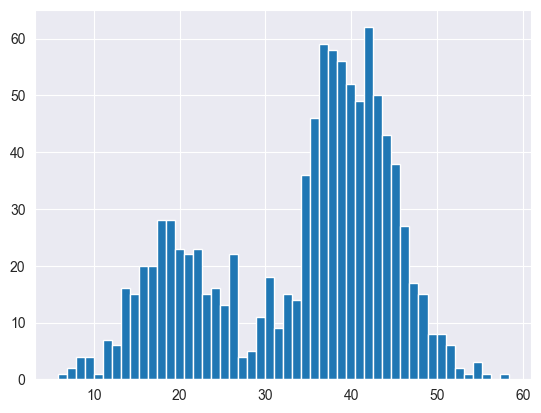

In [22]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [23]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [24]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [25]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

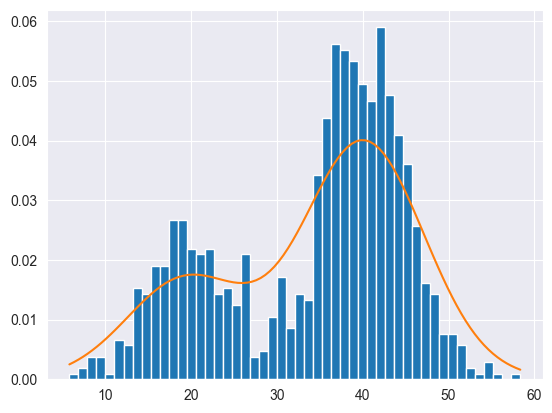

In [26]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

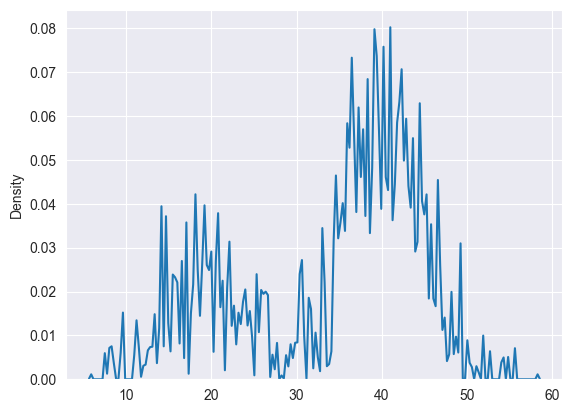

In [27]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [28]:
import seaborn as sns

In [29]:
df = sns.load_dataset('iris')

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

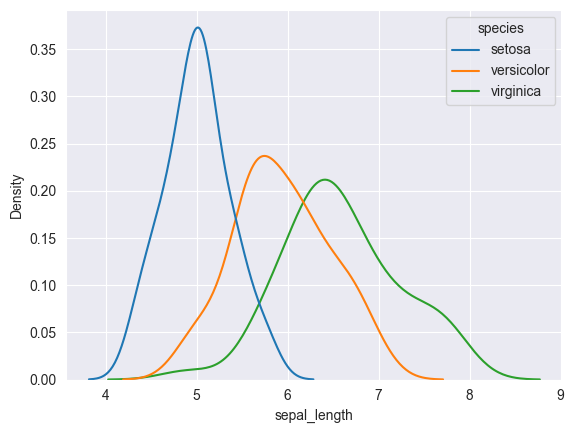

In [31]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

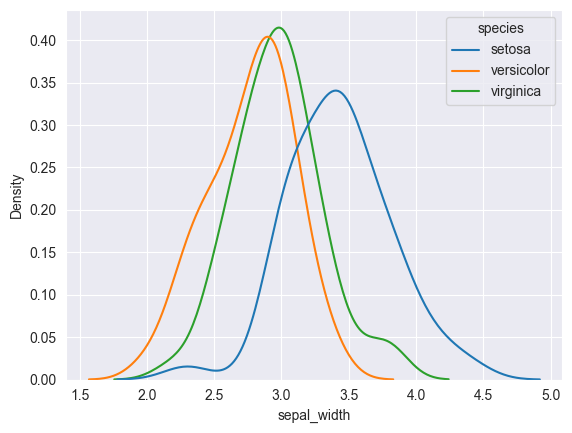

In [32]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

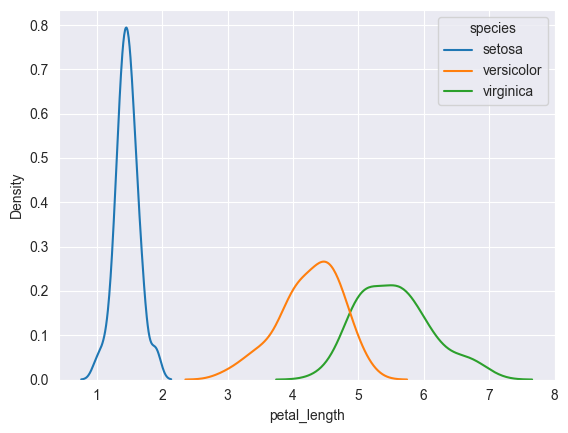

In [33]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

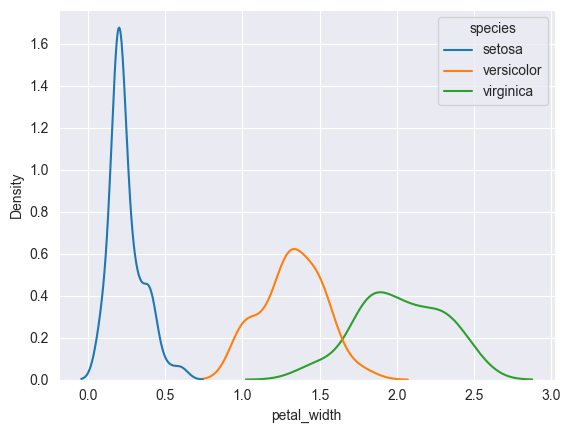

In [34]:
sns.kdeplot(data=df,x='petal_width',hue='species')

In [35]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

In [ ]:
x.std()

In [ ]:
titanic['Age'].skew()

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

In [ ]:
titanic[titanic['Age'] > 73]

In [ ]:
titanic['Age'].max()